In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split    
from sklearn.datasets import fetch_openml

In [3]:
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
column_names = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']
data = pd.read_csv(url, names=column_names)

In [4]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [10]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [ ]:
from collections import Counter
print(f"Original CLass Distribution: {Counter(data['Outcome'])}")

Original CLass Distribution: Counter({0: 500, 1: 268})


In [20]:
data['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [38]:
data_minority = data[data['Outcome'] == 1]
data_majority = data[data['Outcome'] == 0]


In [39]:
# Upsampling

from sklearn.utils import resample

data_minority_Upsampled= resample(data_minority, replace= True, n_samples= len(data_majority), random_state=42)

In [44]:
data_upsampled = pd.concat([data_minority_Upsampled, data_majority])

print(f"After Sampling: {Counter(data_upsampled['Outcome'])}")

After Sampling: Counter({1: 500, 0: 500})


In [45]:
# DownSampling
data_minority = data[data['Outcome'] == 1]
data_majority = data[data['Outcome'] == 0]

In [46]:
from sklearn.utils import resample

data_majority_DownSampled = resample(data_majority, replace=False, n_samples = len(data_minority), random_state=42)

In [48]:
data_Downsampled = pd.concat([data_majority_DownSampled, data_minority])

In [49]:
print(f"After Sampling: {Counter(data_Downsampled['Outcome'])}")

After Sampling: Counter({0: 268, 1: 268})


Text(0.5, 1.0, 'DoWn Sampling')

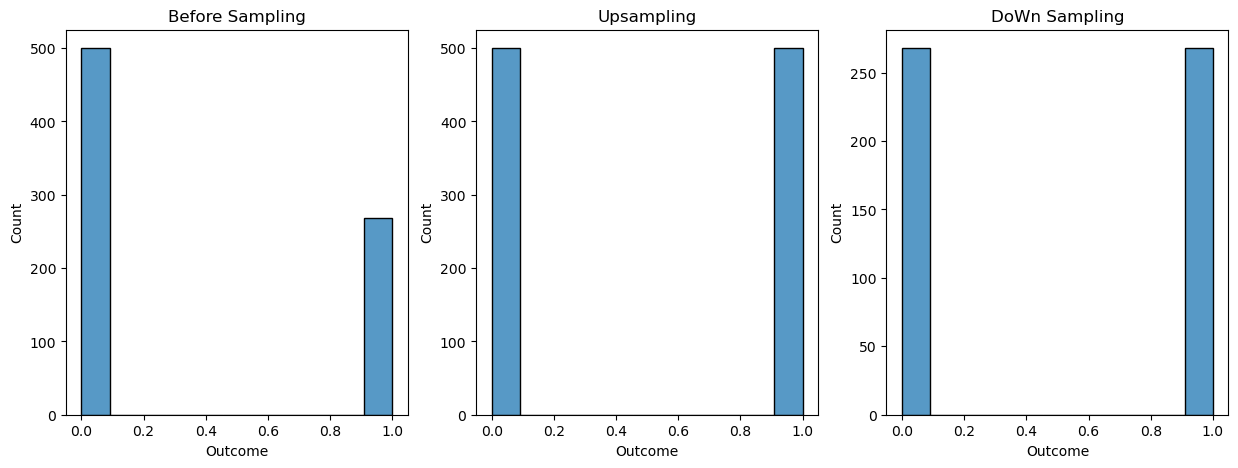

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(1,3, figsize= (15,5))

sns.histplot(data['Outcome'],ax=axes[0])
axes[0].set_title("Before Sampling")


sns.histplot(data_upsampled['Outcome'],ax=axes[1])
axes[1].set_title("Upsampling")


sns.histplot(data_Downsampled['Outcome'],ax=axes[2])
axes[2].set_title("DoWn Sampling")